In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 100)
pd.set_option("max_colwidth", 200)

from sklearn import preprocessing
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import RepeatedKFold

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
ordinal = pd.read_csv('../Data/BaseOrdinal.csv')
ordinal.shape

(2580, 81)

In [4]:
ordinal = ordinal.drop(['Unnamed: 0'], axis=1)
ordinal.shape

(2580, 80)

In [5]:
X = ordinal.drop(['SalePrice'], axis=1)
y = ordinal.SalePrice

In [6]:
gb = GradientBoostingRegressor(random_state=1)
cb = CatBoostRegressor(random_state=1, verbose=False)

In [7]:
gb_cb_cv = StackingRegressor(estimators=[('GB', gb)], final_estimator=cb,
                                       cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1),
                                       passthrough=True)

In [8]:
gb_cb = StackingRegressor(estimators=[('GB', gb)], final_estimator=cb, passthrough=True)

In [9]:
# Use cross-validation to evaluate model performance

def evaluate_model(model, X, y):
    
    # define the evaluation procedure
    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
    
    # evaluate the model and collect the results
    scores = cross_validate(model, X, y, cv=cv, n_jobs=-1)
    
    #scores = cross_validate(model, X, y, scoring=scoring, 
    #                              cv=cv, n_jobs=-1) 
    
    df = pd.DataFrame(scores)
    
    return df

In [10]:
cat = evaluate_model(cb, X, y)

In [11]:
cat = cat[['test_score']].rename(columns={'test_score':'cat_score'})

In [12]:
cat

,cat_score
0,0.920566
1,0.899820
2,0.938045
3,0.933383
4,0.949361
5,0.934502
6,0.944618
7,0.924652
8,0.947610
9,0.883656


In [13]:
g = evaluate_model(gb, X, y)

In [14]:
g = g[['test_score']].rename(columns={'test_score':'gb_score'})

In [15]:
g

,gb_score
0,0.914384
1,0.831491
2,0.917112
3,0.910775
4,0.928567
5,0.909586
6,0.926628
7,0.895272
8,0.928754
9,0.836306


In [16]:
GB_CB_CV = evaluate_model(gb_cb_cv, X, y)

In [17]:
GB_CB_CV = GB_CB_CV[['test_score']].rename(columns={'test_score':'GB_CB_CV'})

In [18]:
GB_CB_CV

,GB_CB_CV
0,0.926582
1,0.901820
2,0.935504
3,0.925199
4,0.944707
5,0.924770
6,0.939281
7,0.921177
8,0.945114
9,0.880601


In [19]:
GB_CB = evaluate_model(gb_cb, X, y)

In [20]:
GB_CB = GB_CB[['test_score']].rename(columns={'test_score':'GB_CB'})

In [21]:
GB_CB

,GB_CB
0,0.918441
1,0.894153
2,0.931975
3,0.919748
4,0.945851
5,0.924672
6,0.942337
7,0.928179
8,0.947352
9,0.889145


In [22]:
combo = pd.concat([cat, g, GB_CB_CV, GB_CB], axis=1)

In [23]:
combo

,cat_score,gb_score,GB_CB_CV,GB_CB
0,0.920566,0.914384,0.926582,0.918441
1,0.899820,0.831491,0.901820,0.894153
2,0.938045,0.917112,0.935504,0.931975
3,0.933383,0.910775,0.925199,0.919748
4,0.949361,0.928567,0.944707,0.945851
5,0.934502,0.909586,0.924770,0.924672
6,0.944618,0.926628,0.939281,0.942337
7,0.924652,0.895272,0.921177,0.928179
8,0.947610,0.928754,0.945114,0.947352
9,0.883656,0.836306,0.880601,0.889145


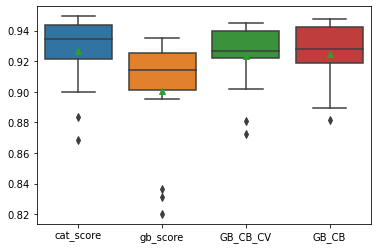

In [24]:
sns.boxplot(data=combo, showmeans=True);

In [25]:
combo.describe()

,cat_score,gb_score,GB_CB_CV,GB_CB
count,15.000000,15.000000,15.000000,15.000000
mean,0.926385,0.900217,0.923726,0.924451
std,0.024378,0.038179,0.022409,0.021300
min,0.868666,0.820084,0.872596,0.881885
25%,0.921228,0.901359,0.921813,0.919094
50%,0.934502,0.914384,0.926582,0.928179
75%,0.943737,0.925660,0.939876,0.942592
max,0.949361,0.935113,0.945114,0.947352


In [26]:
ordinald1 = pd.read_csv('OrdinalDrop1.csv')
ordinald1.shape

(2579, 83)

In [27]:
ordinald1 = ordinald1.drop(['Unnamed: 0', 'PID', 'Unnamed: 0.1'], axis=1)
ordinald1.shape

(2579, 80)

In [28]:
X1 = ordinald1.drop(['SalePrice'], axis=1)
y1 = ordinald1.SalePrice

In [29]:
catd1 = evaluate_model(cb, X1, y1)

In [30]:
catd1 = catd1[['test_score']].rename(columns={'test_score':'catd1_score'})

In [31]:
catd1

,catd1_score
0,0.931308
1,0.946897
2,0.946280
3,0.911824
4,0.949900
5,0.933133
6,0.929582
7,0.926053
8,0.950737
9,0.939564


In [32]:
gd1 = evaluate_model(gb, X1, y1)

In [33]:
gd1 = gd1[['test_score']].rename(columns={'test_score':'gbd1_score'})

In [34]:
gd1

,gbd1_score
0,0.908753
1,0.939744
2,0.936716
3,0.895961
4,0.937107
5,0.915868
6,0.923176
7,0.919474
8,0.941296
9,0.921069


In [35]:
GB_CB_CV_d1 = evaluate_model(gb_cb_cv, X1, y1)

In [36]:
GB_CB_CV_d1 = GB_CB_CV_d1[['test_score']].rename(columns={'test_score':'GB_CB_CV_d1'})

In [37]:
GB_CB_CV_d1

,GB_CB_CV_d1
0,0.926286
1,0.947589
2,0.945496
3,0.905740
4,0.950007
5,0.929574
6,0.933765
7,0.925759
8,0.950280
9,0.931964


In [38]:
GB_CB_d1 = evaluate_model(gb_cb, X1, y1)

In [39]:
GB_CB_d1 = GB_CB_d1[['test_score']].rename(columns={'test_score':'GB_CB_d1'})

In [40]:
GB_CB_d1

,GB_CB_d1
0,0.923769
1,0.948160
2,0.943670
3,0.906592
4,0.949078
5,0.928476
6,0.933644
7,0.925781
8,0.950220
9,0.934893


In [41]:
combo_d1 = pd.concat([cat, g, GB_CB_CV, GB_CB, catd1, gd1, GB_CB_CV_d1, GB_CB_d1], axis=1)

In [42]:
combo_d1

,cat_score,gb_score,GB_CB_CV,GB_CB,catd1_score,gbd1_score,GB_CB_CV_d1,GB_CB_d1
0,0.920566,0.914384,0.926582,0.918441,0.931308,0.908753,0.926286,0.923769
1,0.899820,0.831491,0.901820,0.894153,0.946897,0.939744,0.947589,0.948160
2,0.938045,0.917112,0.935504,0.931975,0.946280,0.936716,0.945496,0.943670
3,0.933383,0.910775,0.925199,0.919748,0.911824,0.895961,0.905740,0.906592
4,0.949361,0.928567,0.944707,0.945851,0.949900,0.937107,0.950007,0.949078
5,0.934502,0.909586,0.924770,0.924672,0.933133,0.915868,0.929574,0.928476
6,0.944618,0.926628,0.939281,0.942337,0.929582,0.923176,0.933765,0.933644
7,0.924652,0.895272,0.921177,0.928179,0.926053,0.919474,0.925759,0.925781
8,0.947610,0.928754,0.945114,0.947352,0.950737,0.941296,0.950280,0.950220
9,0.883656,0.836306,0.880601,0.889145,0.939564,0.921069,0.931964,0.934893


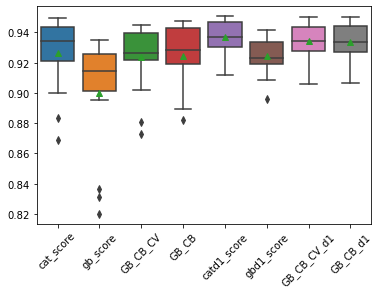

In [43]:
sns.boxplot(data=combo_d1, showmeans=True).tick_params(axis='x', labelrotation=45);

In [44]:
combo_d1.describe()

,cat_score,gb_score,GB_CB_CV,GB_CB,catd1_score,gbd1_score,GB_CB_CV_d1,GB_CB_d1
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,0.926385,0.900217,0.923726,0.924451,0.936878,0.924317,0.934417,0.933957
std,0.024378,0.038179,0.022409,0.021300,0.011131,0.012277,0.012178,0.012242
min,0.868666,0.820084,0.872596,0.881885,0.911824,0.895961,0.905740,0.906592
25%,0.921228,0.901359,0.921813,0.919094,0.930445,0.918784,0.927930,0.927128
50%,0.934502,0.914384,0.926582,0.928179,0.936986,0.923176,0.933977,0.933644
75%,0.943737,0.925660,0.939876,0.942592,0.946589,0.933732,0.943374,0.944266
max,0.949361,0.935113,0.945114,0.947352,0.950737,0.941296,0.950280,0.950220


In [45]:
ordinald2 = pd.read_csv('OrdinalDrop2.csv')
ordinald2.shape

(2578, 83)

In [46]:
ordinald2 = ordinald2.drop(['Unnamed: 0', 'PID', 'Unnamed: 0.1'], axis=1)
ordinald2.shape

(2578, 80)

In [47]:
X2 = ordinald2.drop(['SalePrice'], axis=1)
y2 = ordinald2.SalePrice

In [48]:
catd2 = evaluate_model(cb, X2, y2)

In [49]:
catd2 = catd2[['test_score']].rename(columns={'test_score':'catd2_score'})

In [50]:
catd2

,catd2_score
0,0.931945
1,0.938533
2,0.947346
3,0.918753
4,0.944991
5,0.934845
6,0.941550
7,0.933222
8,0.945822
9,0.942002


In [51]:
gd2 = evaluate_model(gb, X2, y2)

In [52]:
gd2 = gd2[['test_score']].rename(columns={'test_score':'gbd2_score'})

In [53]:
gd2

,gbd2_score
0,0.914243
1,0.923267
2,0.930881
3,0.897713
4,0.939440
5,0.912199
6,0.932387
7,0.922119
8,0.943442
9,0.916864


In [54]:
GB_CB_CV_d2 = evaluate_model(gb_cb_cv, X2, y2)

In [55]:
GB_CB_CV_d2 = GB_CB_CV_d2[['test_score']].rename(columns={'test_score':'GB_CB_CV_d2'})

In [56]:
GB_CB_CV_d2

,GB_CB_CV_d2
0,0.928059
1,0.940267
2,0.940669
3,0.916298
4,0.945595
5,0.925667
6,0.940447
7,0.931273
8,0.941838
9,0.937244


In [57]:
GB_CB_d2 = evaluate_model(gb_cb, X2, y2)

In [58]:
GB_CB_d2 = GB_CB_d2[['test_score']].rename(columns={'test_score':'GB_CB_d2'})

In [59]:
GB_CB_d2

,GB_CB_d2
0,0.931787
1,0.937868
2,0.946176
3,0.915209
4,0.947324
5,0.927594
6,0.942651
7,0.935038
8,0.942140
9,0.939463


In [60]:
combo_d2 = pd.concat([cat, g, GB_CB_CV, GB_CB, 
                      catd1, gd1, GB_CB_CV_d1, GB_CB_d1, 
                      catd2, gd2, GB_CB_CV_d2, GB_CB_d2], axis=1)

In [61]:
combo_d2

,cat_score,gb_score,GB_CB_CV,GB_CB,catd1_score,gbd1_score,GB_CB_CV_d1,GB_CB_d1,catd2_score,gbd2_score,GB_CB_CV_d2,GB_CB_d2
0,0.920566,0.914384,0.926582,0.918441,0.931308,0.908753,0.926286,0.923769,0.931945,0.914243,0.928059,0.931787
1,0.899820,0.831491,0.901820,0.894153,0.946897,0.939744,0.947589,0.948160,0.938533,0.923267,0.940267,0.937868
2,0.938045,0.917112,0.935504,0.931975,0.946280,0.936716,0.945496,0.943670,0.947346,0.930881,0.940669,0.946176
3,0.933383,0.910775,0.925199,0.919748,0.911824,0.895961,0.905740,0.906592,0.918753,0.897713,0.916298,0.915209
4,0.949361,0.928567,0.944707,0.945851,0.949900,0.937107,0.950007,0.949078,0.944991,0.939440,0.945595,0.947324
5,0.934502,0.909586,0.924770,0.924672,0.933133,0.915868,0.929574,0.928476,0.934845,0.912199,0.925667,0.927594
6,0.944618,0.926628,0.939281,0.942337,0.929582,0.923176,0.933765,0.933644,0.941550,0.932387,0.940447,0.942651
7,0.924652,0.895272,0.921177,0.928179,0.926053,0.919474,0.925759,0.925781,0.933222,0.922119,0.931273,0.935038
8,0.947610,0.928754,0.945114,0.947352,0.950737,0.941296,0.950280,0.950220,0.945822,0.943442,0.941838,0.942140
9,0.883656,0.836306,0.880601,0.889145,0.939564,0.921069,0.931964,0.934893,0.942002,0.916864,0.937244,0.939463


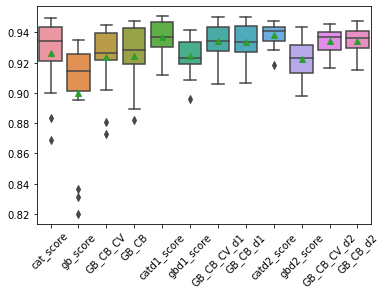

In [62]:
sns.boxplot(data=combo_d2, showmeans=True).tick_params(axis='x', labelrotation=45);

In [63]:
combo_d2.describe()

,cat_score,gb_score,GB_CB_CV,GB_CB,catd1_score,gbd1_score,GB_CB_CV_d1,GB_CB_d1,catd2_score,gbd2_score,GB_CB_CV_d2,GB_CB_d2
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,0.926385,0.900217,0.923726,0.924451,0.936878,0.924317,0.934417,0.933957,0.938227,0.922535,0.934212,0.934618
std,0.024378,0.038179,0.022409,0.021300,0.011131,0.012277,0.012178,0.012242,0.007841,0.013025,0.008465,0.009223
min,0.868666,0.820084,0.872596,0.881885,0.911824,0.895961,0.905740,0.906592,0.918753,0.897713,0.916298,0.915209
25%,0.921228,0.901359,0.921813,0.919094,0.930445,0.918784,0.927930,0.927128,0.934034,0.913221,0.928448,0.929690
50%,0.934502,0.914384,0.926582,0.928179,0.936986,0.923176,0.933977,0.933644,0.941039,0.923267,0.937244,0.936096
75%,0.943737,0.925660,0.939876,0.942592,0.946589,0.933732,0.943374,0.944266,0.943497,0.931634,0.940558,0.940802
max,0.949361,0.935113,0.945114,0.947352,0.950737,0.941296,0.950280,0.950220,0.947346,0.943442,0.945595,0.947324


In [64]:
ordinalIF = pd.read_csv('OrdinalDropIF.csv')
ordinalIF.shape

(2579, 83)

In [65]:
ordinalIF = ordinalIF.drop(['Unnamed: 0', 'PID', 'Unnamed: 0.1'], axis=1)
ordinalIF.shape

(2579, 80)

In [66]:
XIF = ordinalIF.drop(['SalePrice'], axis=1)
yIF = ordinalIF.SalePrice

In [67]:
catIF = evaluate_model(cb, XIF, yIF)

In [68]:
catIF = catIF[['test_score']].rename(columns={'test_score':'catIF_score'})

In [69]:
catIF

,catIF_score
0,0.931308
1,0.946897
2,0.946280
3,0.911824
4,0.949900
5,0.933133
6,0.929582
7,0.926053
8,0.950737
9,0.939564


In [70]:
gIF = evaluate_model(gb, XIF, yIF)

In [71]:
gIF = gIF[['test_score']].rename(columns={'test_score':'gIF_score'})

In [72]:
gIF

,gIF_score
0,0.908753
1,0.939744
2,0.936716
3,0.895961
4,0.937107
5,0.915868
6,0.923176
7,0.919474
8,0.941296
9,0.921069


In [73]:
GB_CB_CV_IF = evaluate_model(gb_cb_cv, XIF, yIF)

In [74]:
GB_CB_CV_IF = GB_CB_CV_IF[['test_score']].rename(columns={'test_score':'GB_CB_CV_IF_score'})

In [75]:
GB_CB_CV_IF

,GB_CB_CV_IF_score
0,0.926286
1,0.947589
2,0.945496
3,0.905740
4,0.950007
5,0.929574
6,0.933765
7,0.925759
8,0.950280
9,0.931964


In [76]:
GB_CB_IF = evaluate_model(gb_cb, XIF, yIF)

In [77]:
GB_CB_IF = GB_CB_IF[['test_score']].rename(columns={'test_score':'GB_CB_IF_score'})

In [78]:
GB_CB_IF

,GB_CB_IF_score
0,0.923769
1,0.948160
2,0.943670
3,0.906592
4,0.949078
5,0.928476
6,0.933644
7,0.925781
8,0.950220
9,0.934893


In [79]:
ordinal_op = pd.read_csv('OrdinalDrop_one_pct.csv')
ordinal_op.shape

(2558, 81)

In [81]:
ordinal_op = ordinal_op.drop(['Unnamed: 0'], axis=1)
ordinal_op.shape

(2558, 80)

In [82]:
Xop = ordinal_op.drop(['SalePrice'], axis=1)
yop = ordinal_op.SalePrice

In [83]:
catop = evaluate_model(cb, Xop, yop)

In [84]:
catop = catop[['test_score']].rename(columns={'test_score':'catop_score'})

In [85]:
catop

,catop_score
0,0.934553
1,0.947677
2,0.932410
3,0.950387
4,0.924370
5,0.945029
6,0.935680
7,0.931087
8,0.933374
9,0.940581


In [86]:
combo_op = pd.concat([cat, g, GB_CB_CV, GB_CB, 
                      catd1, gd1, GB_CB_CV_d1, GB_CB_d1, 
                      catd2, gd2, GB_CB_CV_d2, GB_CB_d2,
                      catIF, gIF, GB_CB_CV_IF, GB_CB_IF,
                      catop], axis=1)

In [87]:
combo_op

,cat_score,gb_score,GB_CB_CV,GB_CB,catd1_score,gbd1_score,GB_CB_CV_d1,GB_CB_d1,catd2_score,gbd2_score,GB_CB_CV_d2,GB_CB_d2,catIF_score,gIF_score,GB_CB_CV_IF_score,GB_CB_IF_score,catop_score
0,0.920566,0.914384,0.926582,0.918441,0.931308,0.908753,0.926286,0.923769,0.931945,0.914243,0.928059,0.931787,0.931308,0.908753,0.926286,0.923769,0.934553
1,0.899820,0.831491,0.901820,0.894153,0.946897,0.939744,0.947589,0.948160,0.938533,0.923267,0.940267,0.937868,0.946897,0.939744,0.947589,0.948160,0.947677
2,0.938045,0.917112,0.935504,0.931975,0.946280,0.936716,0.945496,0.943670,0.947346,0.930881,0.940669,0.946176,0.946280,0.936716,0.945496,0.943670,0.932410
3,0.933383,0.910775,0.925199,0.919748,0.911824,0.895961,0.905740,0.906592,0.918753,0.897713,0.916298,0.915209,0.911824,0.895961,0.905740,0.906592,0.950387
4,0.949361,0.928567,0.944707,0.945851,0.949900,0.937107,0.950007,0.949078,0.944991,0.939440,0.945595,0.947324,0.949900,0.937107,0.950007,0.949078,0.924370
5,0.934502,0.909586,0.924770,0.924672,0.933133,0.915868,0.929574,0.928476,0.934845,0.912199,0.925667,0.927594,0.933133,0.915868,0.929574,0.928476,0.945029
6,0.944618,0.926628,0.939281,0.942337,0.929582,0.923176,0.933765,0.933644,0.941550,0.932387,0.940447,0.942651,0.929582,0.923176,0.933765,0.933644,0.935680
7,0.924652,0.895272,0.921177,0.928179,0.926053,0.919474,0.925759,0.925781,0.933222,0.922119,0.931273,0.935038,0.926053,0.919474,0.925759,0.925781,0.931087
8,0.947610,0.928754,0.945114,0.947352,0.950737,0.941296,0.950280,0.950220,0.945822,0.943442,0.941838,0.942140,0.950737,0.941296,0.950280,0.950220,0.933374
9,0.883656,0.836306,0.880601,0.889145,0.939564,0.921069,0.931964,0.934893,0.942002,0.916864,0.937244,0.939463,0.939564,0.921069,0.931964,0.934893,0.940581


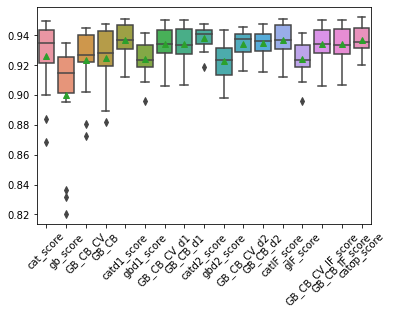

In [88]:
sns.boxplot(data=combo_op, showmeans=True).tick_params(axis='x', labelrotation=45);

In [89]:
combo_op.describe()

,cat_score,gb_score,GB_CB_CV,GB_CB,catd1_score,gbd1_score,GB_CB_CV_d1,GB_CB_d1,catd2_score,gbd2_score,GB_CB_CV_d2,GB_CB_d2,catIF_score,gIF_score,GB_CB_CV_IF_score,GB_CB_IF_score,catop_score
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,0.926385,0.900217,0.923726,0.924451,0.936878,0.924317,0.934417,0.933957,0.938227,0.922535,0.934212,0.934618,0.936878,0.924317,0.934417,0.933957,0.937126
std,0.024378,0.038179,0.022409,0.021300,0.011131,0.012277,0.012178,0.012242,0.007841,0.013025,0.008465,0.009223,0.011131,0.012277,0.012178,0.012242,0.009610
min,0.868666,0.820084,0.872596,0.881885,0.911824,0.895961,0.905740,0.906592,0.918753,0.897713,0.916298,0.915209,0.911824,0.895961,0.905740,0.906592,0.919966
25%,0.921228,0.901359,0.921813,0.919094,0.930445,0.918784,0.927930,0.927128,0.934034,0.913221,0.928448,0.929690,0.930445,0.918784,0.927930,0.927128,0.931748
50%,0.934502,0.914384,0.926582,0.928179,0.936986,0.923176,0.933977,0.933644,0.941039,0.923267,0.937244,0.936096,0.936986,0.923176,0.933977,0.933644,0.935680
75%,0.943737,0.925660,0.939876,0.942592,0.946589,0.933732,0.943374,0.944266,0.943497,0.931634,0.940558,0.940802,0.946589,0.933732,0.943374,0.944266,0.944869
max,0.949361,0.935113,0.945114,0.947352,0.950737,0.941296,0.950280,0.950220,0.947346,0.943442,0.945595,0.947324,0.950737,0.941296,0.950280,0.950220,0.952484
